## InsightsBank Marketing EDA

#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. Applying EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [5]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")\



In [8]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*italicized text*## Data Cleaning

### Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type.




#### Read in the Data set.

In [9]:
#read the data set of "bank telemarketing campaign" in bank.
bank = pd.read_csv("/content/bank_marketing_updated_v1.csv")

In [10]:
#Print the head of the data frame.
bank.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [11]:
#read the file in inp0 without first two rows as it is of no use.
bank = pd.read_csv("bank_marketing_updated_v1.csv" , skiprows = 2)

In [ ]:
#print the head of the data frame.
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [12]:
#print the information of variables to check their data types.
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [ ]:
bank.dropna(subset = ['age'],inplace = True)

In [13]:
#convert the age variable data type from float to integer.
bank.age = bank["age"].astype('int',errors = 'ignore')
bank.age

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

In [14]:
#print the average age of customers.
bank.age.mean()

40.93565090394105

#### Dropping customer id column.

In [15]:
#drop the customer id as it is of no use.
bank.drop(["customerid"],axis = 1 , inplace = True)
bank.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories.

In [16]:
#Extract job in newly created 'job' column from "jobedu" column.
bank['job']= bank.jobedu.apply(lambda x : x.split(",")[0])

In [17]:
#Extract education in newly created 'education' column from "jobedu" column.
bank['education']= bank.jobedu.apply(lambda x : x.split(",")[1])
bank.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [18]:
#drop the "jobedu" column from the dataframe.
bank.drop("jobedu",axis =1 , inplace = True)
bank.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the value of month from the column "month"

In [19]:
# bank.month = bank.month.apply(lambda x : x.split(",")[0])   # here we got error

* Here got error because some values of date column in float data type
* So u
So I am going to check the float values in date column

In [20]:
# Highlighting those records which are floats

bank[bank.month.apply(lambda x : isinstance(x,float))== True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


### Impute/Remove missing values

In [21]:
# Checking the missing values
bank.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### handling missing values in age column.

In [22]:
#count the missing values in age column.
bank.age.isnull().sum()

20

In [23]:
#pring the shape of dataframe inp0
bank.shape

(45211, 19)

In [24]:
#calculate the percentage of missing values in age column.
float(100*20/45211)

0.04423702196368141

Drop the records with age missing.

In [25]:
#drop the records with age missing in bank and copy in bank1 dataframe

bank1 = bank[~bank.age.isnull()].copy()

In [ ]:
bank1.shape

(45191, 19)

In [26]:
# check for the missing values in age
bank1.age.isnull().sum()

0

#### handling missing values in month column

In [27]:
#count the missing values in month column in bank1.
bank1.month.isnull().sum()

50

In [28]:
#print the percentage of each month in the data frame bank1.
bank1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [46]:
#find the mode of month in bank1
month_mode = bank1.month.mode()[0]
month_mode

'may, 2017'

In [47]:
# fill the missing values with mode value of month in bank1.
bank1.month.fillna(month_mode , inplace = True)
bank1.month.value_counts(normalize= True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [30]:
#let's see the null values in the month column.
bank1.month.isnull().sum()

50

#### handling missing values in response column

In [31]:
#count the missing values in response column in bank1.
bank1.response.isnull().sum()

30

In [ ]:
bank1.shape

(45191, 19)

In [32]:
#calculate the percentage of missing values in response column.
float(100*30/45191)

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [33]:
#drop the records with response missings in bank1.
bank2 = bank1[~bank.response.isnull()]
bank1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [34]:
bank2.shape


(45161, 19)

In [35]:
#calculate the missing values in each column of data frame: bank2.
bank2.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

#### handling pdays column.

In [36]:
#describe the pdays column of bank2.
bank2.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.



In [37]:
#describe the pdays column with considering the -1 values. filling it with nan
bank2.loc[bank2.pdays<0 , "pdays"] = np.NaN
bank2.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers

#### Age variable

In [38]:
#describe the age variable in bank2.
bank2.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11733., 12909.,  8007.,  7058.,  3310.,   375.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

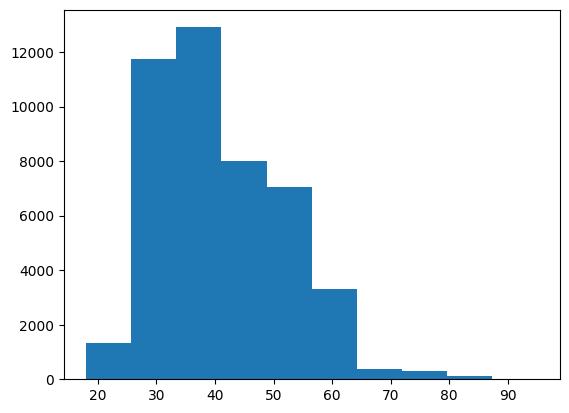

In [40]:
#plot the histogram of age variable.
plt.hist(bank2.age)

<Axes: >

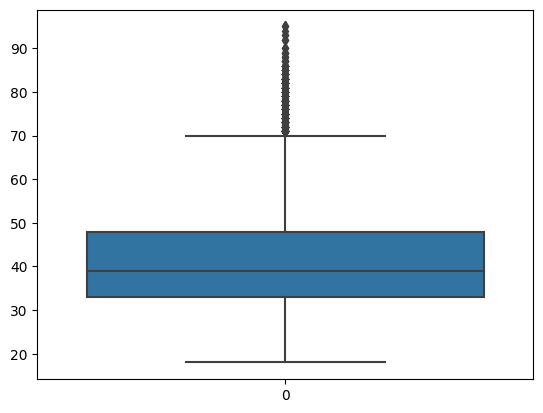

In [41]:
#plot the boxplot of age variable.
sns.boxplot(bank2.age)

#### Salary variable

In [42]:
#describe the salary variable of inp1.
bank2.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: >

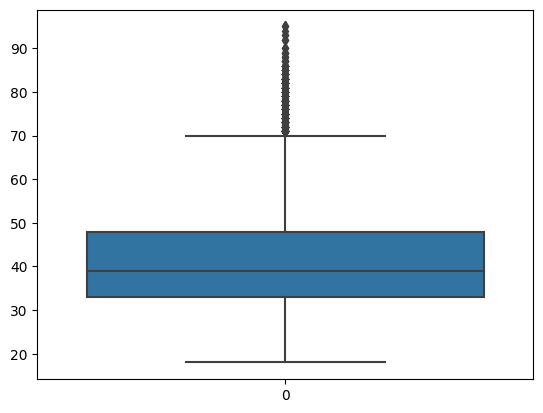

In [43]:
#plot the boxplot of salary variable.
sns.boxplot(bank2.age)

#### Balance variable

In [44]:
#describe the balance variable of inp1.
bank2.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## Univariate Analysis

### Categorical unordered univariate analysis

#### Marital status

In [ ]:
bank2.marital.value_counts()

married     27185
single      12778
divorced     5198
Name: marital, dtype: int64

In [ ]:
#calculate the percentage of each marital status category.
bank2.marital.value_counts(normalize = True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

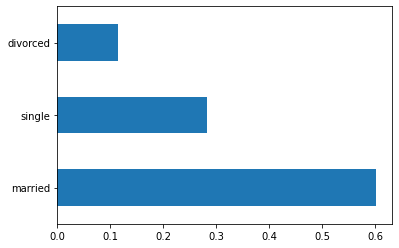

In [ ]:
#plot the bar graph of percentage marital status categories
bank2.marital.value_counts(normalize = True).plot.barh()
plt.show()

#### Job  

In [ ]:
#calculate the percentage of each job status category.
bank2.job.value_counts(normalize = True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

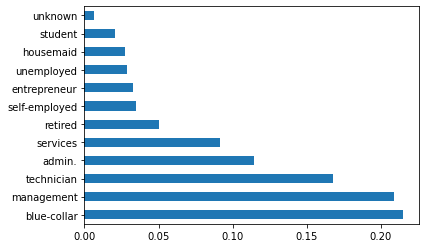

In [ ]:
#plot the bar graph of percentage job categories
bank2.job.value_counts(normalize = True).plot.barh()
plt.show()

### Categorical ordered univariate analysis

#### Education

In [ ]:
#calculate the percentage of each education category.
bank2.education.value_counts(normalize = True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

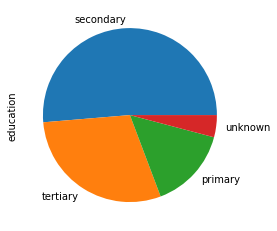

In [ ]:
#plot the pie chart of education categories
bank2.education.value_counts(normalize = True).plot.pie()
plt.show()

#### poutcome

In [ ]:
#calculate the percentage of each poutcome category.
bank2.poutcome.value_counts(normalize = True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

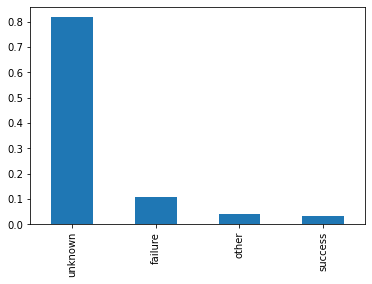

In [ ]:
bank2.poutcome.value_counts(normalize = True).plot.bar()
plt.show()

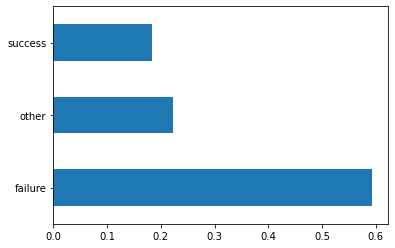

In [ ]:
# Except unknown
bank2[~(bank2.poutcome=="unknown")].poutcome.value_counts(normalize = True).plot.barh()
plt.show()

#### Response the target variable

In [ ]:
#calculate the percentage of each response category.
bank2.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

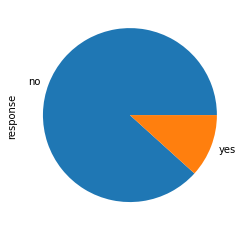

In [ ]:
#plot the pie chart of response categories
bank2.response.value_counts(normalize = True).plot.pie()
plt.show()

## Bivariate and Multivariate Analysis

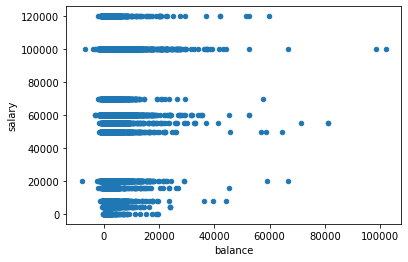

In [ ]:
#plot the scatter plot of balance and salary variable in bank2
bank2.plot.scatter(x = 'balance',y = 'salary')
plt.show()

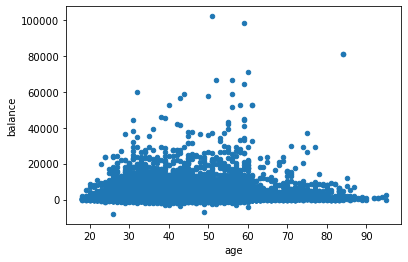

In [ ]:
#plot the scatter plot of balance and age variable in bank2
bank2.plot.scatter(x ='age', y= 'balance')
plt.show()

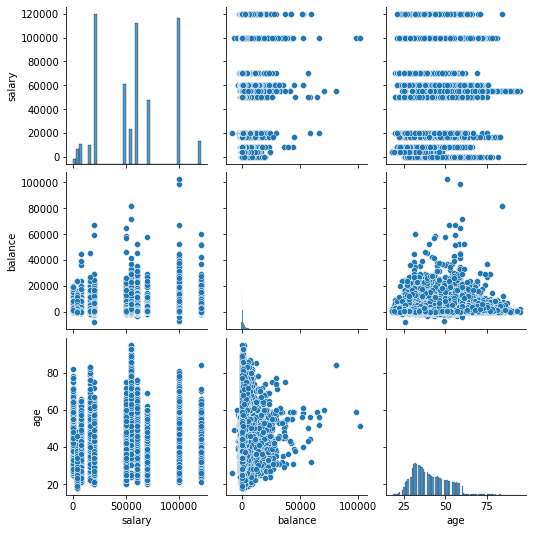

In [ ]:
#plot the pair plot of salary, balance and age in bank2 dataframe.
sns.pairplot( data= bank2, vars = ['salary', 'balance', 'age'])
plt.show()

#### Quantify using correlation values

In [ ]:
bank2[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


#### Correlation heat map

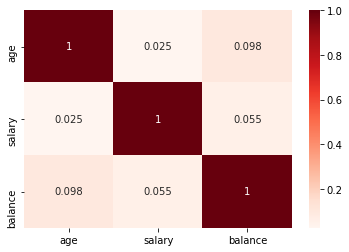

In [ ]:
#plot the correlation matrix of salary, balance and age in bank2 dataframe.
sns.heatmap(bank2[['age','salary','balance']].corr(), annot = True , cmap = "Reds")
plt.show()

### Numerical categorical variable

#### Salary vs response

In [ ]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
bank2.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
#groupby the response to find the median of the salary with response no & yes seperatly.
bank2.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

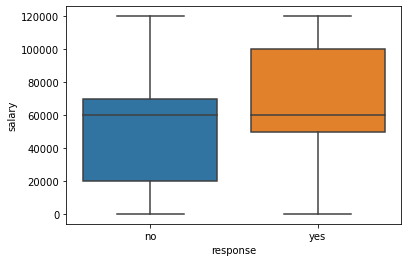

In [ ]:
#plot the box plot of salary for yes & no responses.
sns.boxplot( data = bank2, x = 'response', y = 'salary' )
plt.show()

#### Balance vs response
- We know that balance is highly skewed - has very high values!

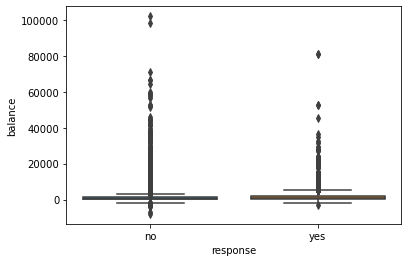

In [ ]:
#plot the box plot of balance for yes & no responses.
sns.boxplot( data = bank2, x = 'response', y = 'balance' )
plt.show()



In [ ]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
bank2.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [ ]:
#groupby the response to find the median of the balance with response no & yes seperatly.
bank2.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile

In [ ]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [ ]:
#calculate the mean, median and 75th percentile of balance with response
bank2.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


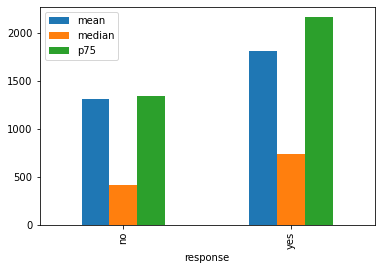

In [ ]:
#plot the bar graph of balance's mean an median with response.
bank2.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()
plt.show()

#### Education vs salary

In [ ]:
#groupby the education to find the mean of the salary education category.
bank2.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [ ]:
#groupby the education to find the median of the salary for each education category.
bank2.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

#### Job vs salary

In [ ]:
#groupby the job to find the mean of the salary for each job category.
bank2.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

### Categorical categorical variable

In [ ]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
bank2['response_flag'] = np.where(bank2.response== 'yes', 1,0)
bank2.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [ ]:
bank2.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [ ]:
bank2.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [ ]:
bank2.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [ ]:
#calculate the mean of response_flag with different education categories.
bank2.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [ ]:
#calculate the mean of response_flag with different marital status categories.
bank2.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

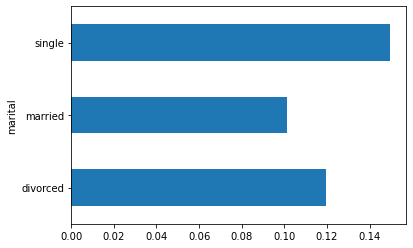

In [ ]:
#plot the bar graph of marital status with average value of response_flag
bank2.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

#### Loans vs response rate

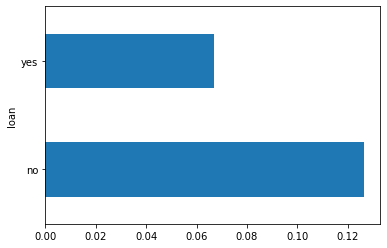

In [ ]:
#plot the bar graph of personal loan status with average value of response_flag
bank2.groupby('loan')['response_flag'].mean().plot.barh()
plt.show()

#### Housing loans vs response rate

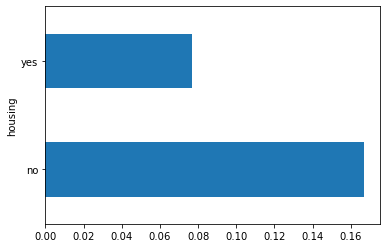

In [ ]:
#plot the bar graph of housing loan status with average value of response_flag
bank2.groupby('housing')['response_flag'].mean().plot.barh()
plt.show()

#### Age vs response

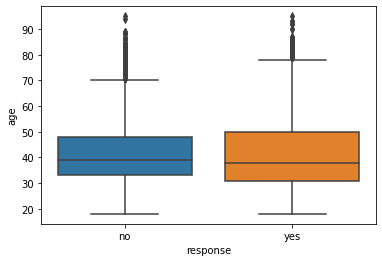

In [ ]:
#plot the boxplot of age with response_flag
sns.boxplot(data = bank2, x = 'response', y = 'age')
plt.show()

##### Making buckets from age columns

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
bank2['age_group'] = pd.cut(bank2.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])

In [ ]:
bank2.age.head()

0    58
1    44
2    33
3    47
4    33
Name: age, dtype: int32

In [ ]:
bank2.age_group.value_counts(normalize = True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

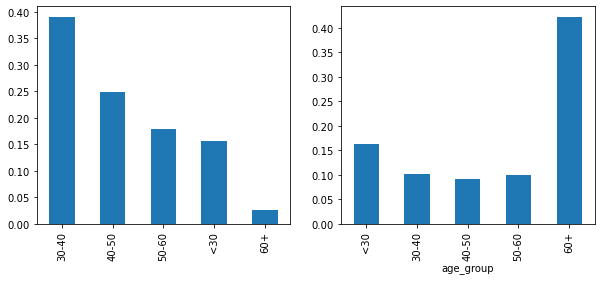

In [ ]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
bank2.age_group.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
bank2.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

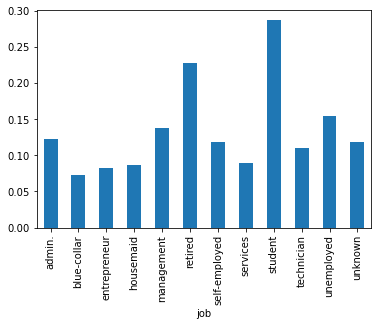

In [ ]:
#plot the bar graph of job categories with response_flag mean value.
bank2.groupby(['job'])['response_flag'].mean().plot.bar()
plt.show()

### Multivariate analysis

#### Education vs marital vs response

In [ ]:
res = pd.pivot_table (data = bank2 , index = 'education', columns= 'marital', values='response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


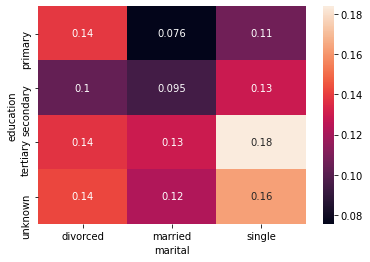

In [ ]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res, annot = True)
plt.show()

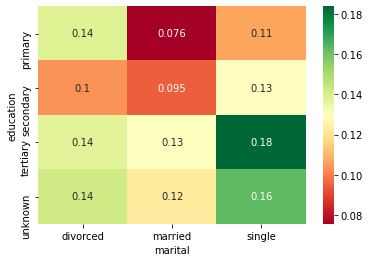

In [ ]:
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

#### Job vs marital vs response

In [ ]:
#create the heat map of Job vs marital vs response_flag.
res1 = pd.pivot_table (data = bank2 , index = 'job', columns= 'marital', values='response_flag')
res1

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


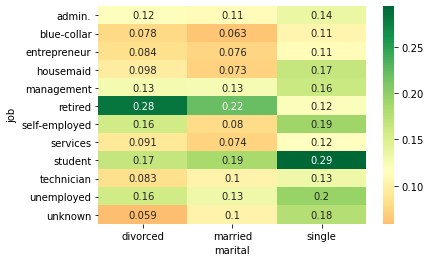

In [ ]:
sns.heatmap(res1, annot = True, cmap = 'RdYlGn',center = 0.117)
plt.show()

#### Education vs poutcome vs response

In [ ]:
#create the heat map of education vs poutcome vs response_flag.
res2 = pd.pivot_table (data = bank2 , index = 'education', columns= 'poutcome', values='response_flag')
res2

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


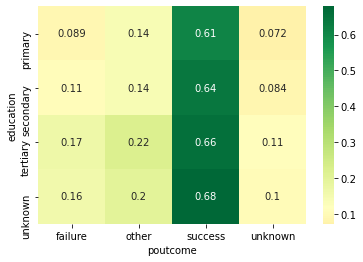

In [ ]:
sns.heatmap(res2, annot = True, cmap = 'RdYlGn', center= 0.117)
plt.show()

In [ ]:
bank2[bank2.pdays>0].response_flag.mean()

0.2307785593014795

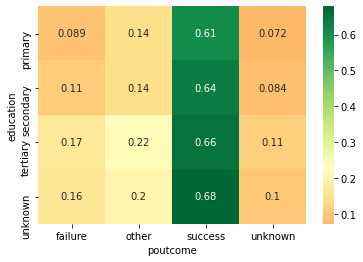

In [ ]:
res2 = pd.pivot_table (data = bank2 , index = 'education', columns= 'poutcome', values='response_flag')
sns.heatmap(res2, annot = True, cmap = 'RdYlGn', center= 0.2308)
plt.show()